In [1]:
import pandas as pd


df1= pd.read_csv('../Labb/data/new_dataset1.csv')
df1.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,BMI_category_normal range,BMI_category_obese (class I),BMI_category_obese (class II),BMI_category_obese (class III),BMI_category_overweight,BMI_category_underweight,BP_category_elevated,BP_category_hypertension stage I,BP_category_hypertension stage II,BP_category_normal,gender_Men,gender_Women
0,0,50.0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
1,1,55.0,3,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1
2,2,52.0,3,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
3,3,48.0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,4,48.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [2]:
df2=pd.read_csv('../Labb/data/new_dataset2.csv')
df2.head()


,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_Men,gender_Women
0,0,50.0,110,80,1,1,0,0,1,0,22.0,1,0
1,1,55.0,140,90,3,1,0,0,1,1,34.9,0,1
2,2,52.0,130,70,3,1,0,0,0,1,23.5,0,1
3,3,48.0,150,100,1,1,0,0,1,1,28.7,1,0
4,4,48.0,100,60,1,1,0,0,0,0,23.0,0,1


# 2.4 - Välja modell
Välj 3-5 maskininlärningsmodeller, gärna så olika som möjligt. För varje dataset som vi skapade i uppgift 2.3
gör följande:

- train|validation|test split
- skala datasetet med feature standardization och normalization (de görs inte samtidigt, utan i olika omgångar)
- definiera hyperparametrar (param_grids) att testa för varje modell
- använda GridSearchCV() och välja lämplig evalueringsmetric
- gör prediction på valideringsdata
- beräkna och spara evaluation score för ditt valda metric
- checka bästa parametrarna för respektive modell



### Choosen models are:
- 1. Logistic Regression
- 2. KNN 
- 3. Decision Tree
- 4. Random Forest
- 5. Gaussian Naive Bayes

### 1. Logistic Regression: 
https://en.wikipedia.org/wiki/Logistic_regression
- Logistic regression is a statistical model used for binary classification problems, which means it predicts the probability event taking place based on a set of input features. 
- Based on data it predicts that a patient having a disease or not based on features such as age, gender, blood pressure,BMI etc.Logistic function has a relationship between the input features and the output variable.
- It is a widely used algorithm in various fields such as medicine, social sciences and economics.

### 2. K-Nearest Neighbors (KNN):
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
- KNN  is a non-parametric supervised machine learning algorithm used for both classification and regression tasks.
- In this data, KNN can be used for predicting whether a patient has cardiovascular disease or not based on their health metrics.
- It identifs the k closest data points (neighbors) in the training set to the given input data point. The algorithm then assigns the output value of the input data point based on the majority class of the k-nearest neighbors.
- It is a widely used algorithm in various fields such as medicine, facial recognition,finance,text mining and recommendation systems.

### 3. Decision Tree:
https://en.wikipedia.org/wiki/Decision_tree
- A decision tree is a supervised machine learning algorithm which is easy to understand, as it creates a tree-like structure that can be interpreted and visualized.
- It can handle both categorical and numerical data and can be used for both classification (i.e., predicting a binary outcome such as "disease" or "no disease") and regression (i.e., predicting a continuous outcome such as blood pressure or cholesterol levels).
- It is a widely used algorithm in various fields such as engineering, fraud detection,credit risk analysis and medical diagnosis.

### 4. Random Forest:
https://en.wikipedia.org/wiki/Random_forest
- Random forest is a machine learning algorithm used for classification, regression, and other tasks. 
- It is an ensemble method that creates multiple decision trees and combines their outputs to make a final prediction.
- In this algorithm,each tree is trained on a random subset of the original dataset and a random subset of the features, which helps to reduce overfitting and increase the models accuracy. 
- It is a widely used algorithm in various fields such as medicine, finance,marketing,image and speech recognition.

### 5. Gaussian Naive Bayes:
https://en.wikipedia.org/wiki/Naive_Bayes_classifier
- Gaussian Naive Bayes is a probabilistic classification algorithm based on Bayes theorem, which describes the probability of a hypothesis based on prior knowledge and new evidence.
-  It is a widely used algorithm in various fields such as text classification, spam filtering, image recognitionand medical diagnosis.

## For first data df1:

- train|validation|test split

In [3]:
print('Number of rows and columns of first dataframe:',df1.shape)

Number of rows and columns of first dataframe: (69971, 20)


In [4]:
from predict_model import split_data

# For df1 data train |val|test split data
X_train1, X_val1, X_test1, y_train1, y_val1, y_test1 = split_data(
    df=df1, target_col="cardio",test_size=0.2, random_state=42)


print(
    f"{X_train1.shape = }\n{X_val1.shape = }\n{X_test1.shape = }\n{y_train1.shape = }\n{y_val1.shape = }\n{y_test1.shape = }\n"
)


X_train1.shape = (55976, 19)
X_val1.shape = (11196, 19)
X_test1.shape = (2799, 19)
y_train1.shape = (55976,)
y_val1.shape = (11196,)
y_test1.shape = (2799,)



- skala datasetet med feature standardization och normalization

#### Feature scaling is standard

In [5]:
from predict_model import scale_features
pipelines = scale_features(scale_type='standard')
pipelines

{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()), ('LR', LogisticRegression())]),
 'K-Nearest Neighbor': Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]),
 'Decision Tree': Pipeline(steps=[('scaling', StandardScaler()),
                 ('DT', DecisionTreeClassifier())]),
 'Random Forest': Pipeline(steps=[('scaling', StandardScaler()),
                 ('RF', RandomForestClassifier())]),
 'Gaussian Naive Bayes': Pipeline(steps=[('scaling', StandardScaler()), ('NB', GaussianNB())])}

- define hyperparameters for choosen models

In [6]:

# Logistic Regression hyperparameters
log_param_grid = [ {'LR__C': [0.01, 0.1, 1, 10, 100], 'LR__penalty': ['l2'], 'LR__solver': ['lbfgs','newton-cg','sag','saga'],'LR__max_iter': [1000, 5000, 10000]}]

# KNN hyperparameters
knn_param_grid = [{'KNN__n_neighbors': [3, 5, 7, 9, 11], 'KNN__weights': ['uniform', 'distance']}]

# Decision Tree hyperparameters
tree_param_grid = [{'DT__max_depth': [5, 10, 20], 'DT__min_samples_split': [2, 5, 10]}]


# Random Forest hyperparameters
forest_param_grid = [{'RF__n_estimators': [10, 50, 100, 200], 'RF__max_depth': [5, 10, 20], 'RF__min_samples_split': [2, 5, 10]}]


# GaussianNB hyperparameters
Gaussian_param_grid = [{'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}]

In [7]:
param_grids = {
    'Logistic Regression': log_param_grid,
    'K-Nearest Neighbor': knn_param_grid,
    #'Support vector machines linear': svm_param_grid,
    'Decision Tree': tree_param_grid,
    'Random Forest': forest_param_grid,
    'Gaussian Naive Bayes': Gaussian_param_grid
}

In [58]:
from predict_model import grid_search, evaluate_classification

for model_name, pipeline in pipelines.items():
    param_grid = param_grids[model_name]
    print('=============================================\n')
    print(f'{model_name:}\n')
    score_file='results/accuracy_scores.txt'
    grid_search(pipeline, param_grid, X_train1, y_train1, X_val1, y_val1,'dataset1_standard',score_file)
    evaluate_classification(y_val1, y_pred)

ImportError: cannot import name 'evaluate_classification' from 'predict_model' (c:\Users\vinee\Documents\Github\Machine-Learning-vineela-nedunuri\Labb\predict_model.py)

### Feature scaling is minmax

In [9]:

pipelines_min = scale_features(scale_type='minmax')
pipelines_min

{'Logistic Regression': Pipeline(steps=[('scaler', MinMaxScaler()), ('LR', LogisticRegression())]),
 'K-Nearest Neighbor': Pipeline(steps=[('scaler', MinMaxScaler()), ('KNN', KNeighborsClassifier())]),
 'Decision Tree': Pipeline(steps=[('scaling', MinMaxScaler()), ('DT', DecisionTreeClassifier())]),
 'Random Forest': Pipeline(steps=[('scaling', MinMaxScaler()), ('RF', RandomForestClassifier())]),
 'Gaussian Naive Bayes': Pipeline(steps=[('scaling', MinMaxScaler()), ('NB', GaussianNB())])}

In [10]:
for model_name, pipeline in pipelines_min.items():
    param_grid = param_grids[model_name]
    print('==============================================\n')
    print(f'{model_name:}\n')
    grid_search(pipeline, param_grid, X_train1, y_train1, X_val1, y_val1,'dataset1_minmax',score_file)


Logistic Regression

Accuracy Score: 70.42%
F1 Score: 0.69
Best parameters: {'LR__C': 100, 'LR__max_iter': 1000, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}

K-Nearest Neighbor

Accuracy Score: 68.19%
F1 Score: 0.68
Best parameters: {'KNN__n_neighbors': 11, 'KNN__weights': 'uniform'}

Decision Tree

Accuracy Score: 69.36%
F1 Score: 0.68
Best parameters: {'DT__max_depth': 10, 'DT__min_samples_split': 2}

Random Forest

Accuracy Score: 70.45%
F1 Score: 0.69
Best parameters: {'RF__max_depth': 10, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}

Gaussian Naive Bayes

Accuracy Score: 68.47%
F1 Score: 0.67
Best parameters: {'NB__var_smoothing': 1e-09}


## For first data df2:

- train|validation|test split

In [11]:
print('Number of rows and columns of second dataframe:',df2.shape)

Number of rows and columns of second dataframe: (69971, 13)


In [12]:
# For df1 data train |val|test split data
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2 = split_data(
    df=df2, target_col="cardio", test_size=0.2, random_state=42
)

print(
    f"{X_train2.shape = }\n{X_val2.shape = }\n{X_test2.shape = }\n{y_train2.shape = }\n{y_val2.shape = }\n{y_test2.shape = }\n"
)


X_train2.shape = (55976, 12)
X_val2.shape = (11196, 12)
X_test2.shape = (2799, 12)
y_train2.shape = (55976,)
y_val2.shape = (11196,)
y_test2.shape = (2799,)



#### Feature scaling is standard

In [13]:
# standad scaling for dataset 2
pipelines_stand = scale_features(scale_type='standard')
pipelines_stand

{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()), ('LR', LogisticRegression())]),
 'K-Nearest Neighbor': Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]),
 'Decision Tree': Pipeline(steps=[('scaling', StandardScaler()),
                 ('DT', DecisionTreeClassifier())]),
 'Random Forest': Pipeline(steps=[('scaling', StandardScaler()),
                 ('RF', RandomForestClassifier())]),
 'Gaussian Naive Bayes': Pipeline(steps=[('scaling', StandardScaler()), ('NB', GaussianNB())])}

In [14]:

for model_name, pipeline in pipelines_stand.items():
    param_grid = param_grids[model_name]
    print(' ===============================================\n')
    print(f'{model_name:}\n')
    grid_search(pipeline, param_grid, X_train2, y_train2, X_val2, y_val2,'dataset2_standard',score_file)


Logistic Regression

Accuracy Score: 72.25%
F1 Score: 0.71
Best parameters: {'LR__C': 100, 'LR__max_iter': 1000, 'LR__penalty': 'l2', 'LR__solver': 'saga'}

K-Nearest Neighbor

Accuracy Score: 65.47%
F1 Score: 0.65
Best parameters: {'KNN__n_neighbors': 11, 'KNN__weights': 'distance'}

Decision Tree

Accuracy Score: 72.78%
F1 Score: 0.71
Best parameters: {'DT__max_depth': 10, 'DT__min_samples_split': 2}

Random Forest

Accuracy Score: 73.65%
F1 Score: 0.73
Best parameters: {'RF__max_depth': 10, 'RF__min_samples_split': 10, 'RF__n_estimators': 100}

Gaussian Naive Bayes

Accuracy Score: 59.05%
F1 Score: 0.42
Best parameters: {'NB__var_smoothing': 1e-09}


#### Feature scaling is minmax


In [15]:
# Min max scaling for dataset 2
pipelines_max = scale_features(scale_type='minmax')
pipelines_max

{'Logistic Regression': Pipeline(steps=[('scaler', MinMaxScaler()), ('LR', LogisticRegression())]),
 'K-Nearest Neighbor': Pipeline(steps=[('scaler', MinMaxScaler()), ('KNN', KNeighborsClassifier())]),
 'Decision Tree': Pipeline(steps=[('scaling', MinMaxScaler()), ('DT', DecisionTreeClassifier())]),
 'Random Forest': Pipeline(steps=[('scaling', MinMaxScaler()), ('RF', RandomForestClassifier())]),
 'Gaussian Naive Bayes': Pipeline(steps=[('scaling', MinMaxScaler()), ('NB', GaussianNB())])}

In [16]:

for model_name, pipeline in pipelines_max.items():
    param_grid = param_grids[model_name]
    print(' ==================================================\n')
    print(f'{model_name:}\n')
    grid_search(pipeline, param_grid, X_train2, y_train2, X_val2, y_val2,'dataset2_minax',score_file)


Logistic Regression

Accuracy Score: 69.80%
F1 Score: 0.69
Best parameters: {'LR__C': 100, 'LR__max_iter': 1000, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}

K-Nearest Neighbor

Accuracy Score: 60.87%
F1 Score: 0.60
Best parameters: {'KNN__n_neighbors': 11, 'KNN__weights': 'uniform'}

Decision Tree

Accuracy Score: 72.81%
F1 Score: 0.71
Best parameters: {'DT__max_depth': 10, 'DT__min_samples_split': 2}

Random Forest

Accuracy Score: 73.52%
F1 Score: 0.72
Best parameters: {'RF__max_depth': 10, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}

Gaussian Naive Bayes

Accuracy Score: 58.99%
F1 Score: 0.42
Best parameters: {'NB__var_smoothing': 1e-05}


Vilket dataset väljer du och vilken modell väljer du? Använd den modellen du valt och träna på all data förutom testdatan.


###### https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
- Accuracy is a common metric used to measure overall model performance but it can be misleading if the dataset is imbalanced which means one class is much more prevalent than the other. In such cases we can consider precision, recall, and F1 score can be more informative.
- So here F1 score and accuracy are consider to measure the model performance.

- Based on the results that are saved in accuracy scores  text file, it seems that the Random Forest classifier is the best model because it achieved the highest F1 score and accuracy on both datasets.

- While in datasets, it seems that dataset2_standard performed better than dataset1_standard as it achieved higher F1 and accuracy scores across all models.

In [38]:
# for dataset2 with standard scale: Random forest classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score,f1_score

# split total df2 into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop('cardio', axis=1), df2['cardio'], test_size=0.2, random_state=42)
#X_train.shape, y_train.shape

# from data 2 train val test split function splits:train:val:test -so we neglecting test data 
#X_train = pd.concat([X_train2, X_val2])
#y_train= pd.concat([y_train2, y_val2])
#X_test= X_test2
#y_test= y_test2

# pipline and hyperparameters for Random Forest
random_pipeline = Pipeline([('scaler', StandardScaler()),('rf', RandomForestClassifier())])
param_grid_rf={'rf__max_depth': [10] ,'rf__min_samples_split': [10], 'rf__n_estimators': [100]}

grid_search= GridSearchCV(estimator=random_pipeline, param_grid=param_grid_rf, scoring="f1", cv=3,error_score='raise')


# to fit that object to training data
grid_search.fit(X_train, y_train)


# predictions on test data
y_pred = grid_search.predict(X_test)
   
    
# Calculate evaluation score
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

# calculate evaluation score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")



Accuracy Score: 73.36%
F1 Score: 0.72


# 2.5 Ensemble
Använd VotingClassifier() på datasetet som du valt och lägg in de bästa parametrarna för respektive
modell

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Create the voting classifier for 5 models with their best parameters 
vote_clf = VotingClassifier(
    [
        ("LR", LogisticRegression(C=100, max_iter=1000, penalty ='l2', solver='saga')),
        ("KNN", KNeighborsClassifier(n_neighbors = 11, weights='distance')),
        ("DT", DecisionTreeClassifier(max_depth=10,min_samples_split=2)),
        ("RF", RandomForestClassifier(max_depth=10,min_samples_split=10,n_estimators=100)),
        ("NB", GaussianNB(var_smoothing = 1e-09)),
    ],
    voting="hard",
)


# Train the voting classifier
vote_clf.fit(X_train2, y_train2)

# Evaluate the accuracy of the voting classifier on the test set
y_pred = vote_clf.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred)
print(f'Accuracy of the voting classifier: {accuracy*100:.3f}%')


c:\Users\vinee\.virtualenvs\Machine-learning-tetaV3aO\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy of the voting classifier: 70.882%


# 2.6 Evalueringar
Gör confusion matrices och classification reports för 2.4 och 2.5.

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74      7015
           1       0.77      0.62      0.69      6980

    accuracy                           0.72     13995
   macro avg       0.73      0.72      0.72     13995
weighted avg       0.73      0.72      0.72     13995


Confusion Matrix: 
  [[5736 1279]
 [2653 4327]]



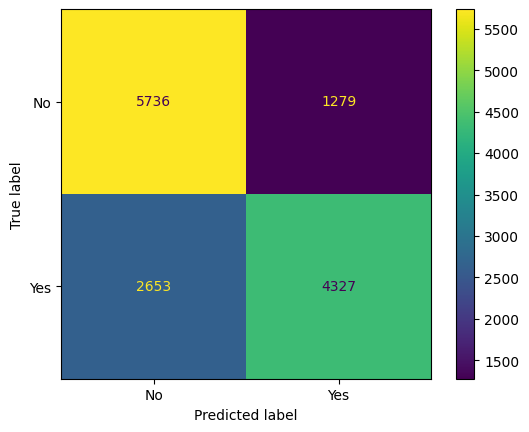

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


def evaluate_classification(y_test, y_pred, labels = ["No", "Yes"]):

    print(f'CLASSIFICATION REPORT:\n {classification_report(y_test, y_pred)}')
    print("=============================\n")
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix: \n ",cm)
    print("=============================\n")
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

# for voting classifier
evaluate_classification(y_test2, y_pred)
